In [671]:
import os
currentPath=os.getcwd()
os.chdir('D:/22 빅콘/퓨처스/데이터')

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action='ignore') 

In [673]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [674]:
loan_result4 = pd.read_csv('loan_result4.csv')
user_spec6 = pd.read_csv('user_spec6.csv')
user_spec1_1 = pd.read_csv("user_spec1_1.csv")
user_spec1_2 = pd.read_csv('user_spec1_2.csv')

In [675]:
user_spec6['is_applied'] = user_spec6['is_applied'].fillna(0)
user_spec6["insert_time"] = pd.to_datetime(user_spec6["insert_time"])
us_drop6 = user_spec6[user_spec6["insert_time"].dt.month < 6]

cl_drop = us_drop6.drop(us_drop6.iloc[:,17:27],axis=1)

In [676]:
user_spec6['is_applied'].value_counts()

0.0    1016564
1.0     377506
Name: is_applied, dtype: int64

## 신뢰성을 주제로 1차 군집화

### 군집화용 전처리

In [677]:
user_spec1_2["insert_time"] = pd.to_datetime(user_spec1_2["insert_time"])
user_spec1_3=user_spec1_2[user_spec1_2["insert_time"].dt.month < 6]

In [678]:
user_spec1_3.head(3)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,cat_age,cat_gender,cat_aft_enter_time,cat_bef_enter_time,rehabilitation,existing_loan_error,existing_loan_cnt_2,existing_loan_amt_2
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01 00:00:00,기타,...,25000000.0,대환대출,중년,남성,0~25,75~100,rehabilitation_not,0,3.0,76250000.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012-11-01 00:00:00,정규직,...,50000000.0,사업자금,중년,여성,75~100,50~75,rehabilitation_not,0,0.0,0.0
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012-10-01 00:00:00,정규직,...,10000000.0,생활비,중년,남성,75~100,50~75,rehabilitation_NA,0,1.0,14250000.0


In [679]:
user_spec1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029338 entries, 153 to 1394069
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   application_id       1029338 non-null  int64         
 1   user_id              1029338 non-null  int64         
 2   birth_year           1022758 non-null  float64       
 3   gender               1022758 non-null  float64       
 4   insert_time          1029338 non-null  datetime64[ns]
 5   credit_score         943730 non-null   float64       
 6   yearly_income        1029338 non-null  float64       
 7   income_type          1029338 non-null  object        
 8   company_enter_month  906344 non-null   object        
 9   employment_type      1029338 non-null  object        
 10  houseown_type        1029338 non-null  object        
 11  desired_amount       1029338 non-null  float64       
 12  purpose              1029338 non-null  object        


In [680]:
user_spec1_3.isna().sum()

application_id              0
user_id                     0
birth_year               6580
gender                   6580
insert_time                 0
credit_score            85608
yearly_income               0
income_type                 0
company_enter_month    122994
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
cat_age                     0
cat_gender                  0
cat_aft_enter_time          0
cat_bef_enter_time          0
rehabilitation              0
existing_loan_error         0
existing_loan_cnt_2         0
existing_loan_amt_2         0
dtype: int64

### 전처리 : birth_year와 company_enter_month NA인 행 제거

In [681]:
temp_drop=user_spec1_3[['insert_time','user_id','birth_year','company_enter_month','income_type','employment_type','houseown_type','rehabilitation']].dropna(subset=['birth_year','company_enter_month'],axis=0)

In [682]:
#깔끔하게 제거된 것 확인
temp_drop.isna().sum()

insert_time            0
user_id                0
birth_year             0
company_enter_month    0
income_type            0
employment_type        0
houseown_type          0
rehabilitation         0
dtype: int64

### 한 명의 user_id에서 입사년월이  여러 개일 경우 의심 대상
### 출생 연도는 하나 씩 존재하여 판단 기준아님

In [683]:
temp_drop[['user_id','birth_year','company_enter_month']].groupby('user_id').nunique()

,birth_year,company_enter_month
user_id,,
7,1,1
9,1,1
11,1,1
12,1,1
14,1,1
...,...,...
879693,1,1
879694,1,1
879695,1,1


### 원하는 형태의 변수 및 데이터프레임 생성과정

In [684]:
print("기본 데이터 셋은 %d개의 행" %len(temp_drop))
temp_drop.head()

기본 데이터 셋은 901145개의 행


,insert_time,user_id,birth_year,company_enter_month,income_type,employment_type,houseown_type,rehabilitation
153,2022-04-20 01:23:09,836762,1979.0,2021-10-01 00:00:00,EARNEDINCOME2,기타,전월세,rehabilitation_not
154,2022-04-20 18:51:40,8623,1979.0,2012-11-01 00:00:00,PRIVATEBUSINESS,정규직,자가,rehabilitation_not
155,2022-04-20 10:08:40,379488,1976.0,2012-10-01 00:00:00,PRIVATEBUSINESS,정규직,기타가족소유,rehabilitation_NA
156,2022-04-20 00:38:18,186886,1979.0,2018-03-01 00:00:00,EARNEDINCOME,정규직,전월세,rehabilitation_not
157,2022-04-20 15:01:01,594274,1993.0,2019-01-01 00:00:00,EARNEDINCOME,정규직,전월세,rehabilitation_not


In [685]:
# user_id 별로 group_by
temp_drop2=temp_drop.groupby(['user_id']).nunique()
temp_drop2.drop('insert_time',axis=1,inplace=True)

In [686]:
temp_drop2.head()

,birth_year,company_enter_month,income_type,employment_type,houseown_type,rehabilitation
user_id,,,,,,
7,1,1,1,1,1,1
9,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,2
14,1,1,1,1,1,1


In [687]:
# birth_year 버리고 변수명 수정
temp_drop3=temp_drop2.drop('birth_year',axis=1)
temp_drop3.columns='n_'+temp_drop3.columns

In [688]:
temp_drop3.head(3)

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,n_rehabilitation
user_id,,,,,
7,1,1,1,1,1
9,1,1,1,1,1
11,1,1,1,1,1


### 최신 날짜 기준의 경력 변수 생성과정 

In [689]:
from datetime import datetime
recent_ymd=datetime(2022,6,1) #확장 필요 있음 굳이 6월 국한 노노

In [690]:
temp_drop['company_enter_month']=pd.to_datetime(temp_drop['company_enter_month'])
temp_drop['work_experience_for_days']=(recent_ymd - temp_drop['company_enter_month']).dt.days
temp_drop4=temp_drop[['user_id','work_experience_for_days']].groupby('user_id').agg('var')
temp_drop4.head(3)

,work_experience_for_days
user_id,
7,NaN
9,NaN
11,0.0


In [691]:
temp_drop['work_experience_for_days']=(recent_ymd - temp_drop['company_enter_month']).dt.days

In [692]:
temp_drop4=temp_drop[['user_id','work_experience_for_days']].groupby('user_id').agg('var')
temp_drop4.head(3)

,work_experience_for_days
user_id,
7,NaN
9,NaN
11,0.0


In [693]:
print(temp_drop4.isna().sum())
temp_drop4.fillna(0,inplace=True)

work_experience_for_days    135644
dtype: int64


In [694]:
temp_drop4.rename(columns={'work_experience_for_days':'var_work_experience_for_days'},inplace=True)
temp_drop4.reset_index(inplace=True)
temp_drop4.head(3)

,user_id,var_work_experience_for_days
0,7,0.0
1,9,0.0
2,11,0.0


In [695]:
temp_drop5=temp_drop3.reset_index()
temp_drop5.head(3)

,user_id,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,n_rehabilitation
0,7,1,1,1,1,1
1,9,1,1,1,1,1
2,11,1,1,1,1,1


In [696]:

temp_drop6=pd.merge(temp_drop5[['user_id','n_company_enter_month','n_income_type',
                                'n_employment_type','n_houseown_type']],
                    temp_drop4,         how='left',on='user_id')
temp_drop6.set_index('user_id',inplace=True)
temp_drop6.head(5)

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
user_id,,,,,
7,1,1,1,1,0.0
9,1,1,1,1,0.0
11,1,1,1,1,0.0
12,1,1,1,1,0.0
14,1,1,1,1,0.0


### MinMax scaling -> use_kmeans4
### 최종 변수 7차원

In [697]:
# scaling model fitting
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(temp_drop6)
Normarlized_Values=scaler.transform(temp_drop6)
use_kmeans = pd.DataFrame(Normarlized_Values, columns = temp_drop6.columns, index = temp_drop6.index)

In [698]:
# scaling 잘되었는지 확인
use_kmeans.describe()

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
count,285930.000000,285930.000000,285930.000000,285930.000000,285930.000000
mean,0.004173,0.014151,0.015441,0.015407,0.000110
std,0.017862,0.063894,0.074975,0.072438,0.003497
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [699]:
use_kmeans.head(3)

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
user_id,,,,,
7,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0


### nunique정보 변수간의 상관관계 확인 : 
### n_employment_type와 n_income_type만 어느 정도 상관성을 보이나, 둘 다 필요하다고 판단.

In [700]:
use_kmeans.corr()

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
n_company_enter_month,1.000000,0.396944,0.364821,0.161041,0.108094
n_income_type,0.396944,1.000000,0.577379,0.108743,0.042121
n_employment_type,0.364821,0.577379,1.000000,0.114110,0.036404
n_houseown_type,0.161041,0.108743,0.114110,1.000000,0.024473
var_work_experience_for_days,0.108094,0.042121,0.036404,0.024473,1.000000


### kmeans 적용

In [701]:
# elbow method를 사용하여 최적의 k를 찾기
from sklearn.cluster import KMeans

distortions = [] 
k_range = range(1,11)

for i in k_range:
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(use_kmeans)
    distortions.append(km.inertia_)

print(distortions)

[4369.649362594324, 2456.371183354985, 1196.2248784154963, 802.8098712322494, 563.1131958240284, 417.9749345058782, 338.07962059087254, 285.3809631725808, 235.34152607973772, 200.2268496855952]


In [702]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾기
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 1196.225


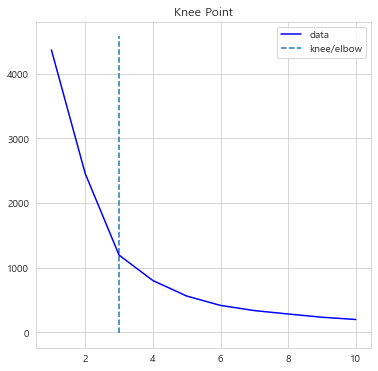

In [703]:
# 시각화로 최적의 k를 확인

kneedle.plot_knee()

In [704]:
# kneed모듈로 정해진 최적의 k로 재훈련시켜보세요.
km = KMeans(n_clusters = 3, random_state=0)
km.fit(use_kmeans)

KMeans(n_clusters=3, random_state=0)

In [705]:
user_data_cluser_centers = pd.DataFrame(km.cluster_centers_, columns=use_kmeans.columns)
user_data_cluser_centers

# 훈련된 모델의 label을 저장
user_data_label_df = use_kmeans.copy()
user_data_label_df["label_from_km"] = km.labels_

#cluster별로 몇 개의 행이 속해있는지 확인 하는 group by
user_data_label_df.groupby(["label_from_km"]).count()

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
label_from_km,,,,,
0,262454,262454,262454,262454,262454
1,11840,11840,11840,11840,11840
2,11636,11636,11636,11636,11636


### (군집0 : 210,127개), (군집1 : 63,402개), (군집2 : 12,401개)  

In [706]:
#군집 정보가 포함된 완성된 데이터프레임
user_data_label_df.head(5)

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days,label_from_km
user_id,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0
11,0.0,0.0,0.0,0.0,0.0,0
12,0.0,0.0,0.0,0.0,0.0,0
14,0.0,0.0,0.0,0.0,0.0,0


In [707]:
#center 값을 통해 군집의 대략적인 특징을 파악해봄
user_data_cluser_centers

,n_company_enter_month,n_income_type,n_employment_type,n_houseown_type,var_work_experience_for_days
0,0.002454,0.005544,1.735764e-14,5.030698e-15,0.000068
1,0.033357,0.199219,3.517455e-01,3.246059e-02,0.000753
2,0.013257,0.019981,2.151369e-02,3.455655e-01,0.000401


### 1차 군집화 결과 : 2번 군집의 값들이 대체적으로 신뢰하기 어려운 정보를 입력하였다고 판단.
### 신뢰하기 어려운 정보를 입력하는 사용자 군집에 대하여 명확히 정보를 입력했는지 확인을 부탁하는 메시지 제안을 할 것.

## 2차 군집화

In [708]:
# 집단 0과 1을 가져와서 2차 클러스터링 진행

cluster1 = user_data_label_df[(user_data_label_df["label_from_km"] == 0) |  (user_data_label_df["label_from_km"] == 1) ]
cluster1.reset_index(inplace=True)

cluseter1_user_spec = user_spec6[user_spec6["user_id"].isin(cluster1["user_id"])]

### user_id 별 count 생성

In [709]:
count_user=cluseter1_user_spec[['application_id','user_id','insert_time']]
count_user2=count_user[pd.to_datetime(count_user["insert_time"]).dt.month< 6]
count_user2.drop('insert_time',axis=1,inplace=True)
count_user3=count_user2.groupby('user_id').agg('count')
count_user3.rename(columns={'application_id':'count'},inplace=True)
count_user3 #273529

,count
user_id,
7,1
9,1
11,2
12,10
14,2
...,...
879693,3
879694,1
879695,1


### user_id 별 2022.06.01 - 첫 insert_time 변수 생성 

In [710]:
cluseter1_user_spec["insert_time"] = pd.to_datetime(cluseter1_user_spec["insert_time"])
sign6 = cluseter1_user_spec[cluseter1_user_spec["insert_time"].dt.month < 6]

sign = sign6[["user_id","insert_time"]]

import datetime
day = datetime.datetime(2022,6,1)
sign["sign_up"] = (day - sign["insert_time"]).dt.days

sign_data= pd.DataFrame(sign.groupby("user_id")["sign_up"].agg("max"))

count_user3.reset_index(inplace=True)
sign_data.reset_index(inplace=True)

df_nu = pd.merge(count_user3,sign_data,on="user_id")

### application_id 수를 센 후 변수 스케일링 작업 

In [711]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


loan_result5= loan_result4[pd.to_datetime(loan_result4["loanapply_insert_time"]).dt.month < 6]
loan_result6 = loan_result5[loan_result5["user_id"].isin(df_nu.index)]
nu_application_id = pd.DataFrame(loan_result6[loan_result6["is_applied"] == 1].groupby("user_id")["application_id"].nunique())
nu_application_id.reset_index(inplace=True)
df_nuu = pd.merge(df_nu , nu_application_id , on="user_id" , how="left").fillna(0)
df_nuu.set_index("user_id",inplace=True)


df_std = scaler.fit_transform(df_nuu)


df_std1 = pd.DataFrame(df_std, columns = ['count_std', 'sign_std' , 'is_applied_std'], index = df_nuu.index)

### k 값에 따른 클러스터링 시각화 

In [712]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
distortions = [] 
k_range = range(1,11)

for i in k_range:
    
    km = KMeans(n_clusters = i, random_state=42)
    km.fit(df_std1)
    distortions.append(km.inertia_)

print(distortions)

[822882.0000000182, 595398.7062462574, 409599.09653507464, 318220.76061262534, 263968.0444542868, 223467.9389385412, 190196.09369497877, 166865.8143167014, 149485.83143268473, 138828.81473541196]


### 최적 k값 3

In [713]:

# 3으로
# elbow method를 그래프로 확인
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 결과확인

In [714]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df_std1)

# 결과 확인
result_by_sklearn = df_std1.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,count_std,sign_std,is_applied_std,cluster
user_id,,,,
7,-0.443234,-1.626013,-0.306615,0
9,-0.443234,-1.589143,-0.306615,0
11,-0.236746,0.549325,1.366089,1
12,1.415157,0.918027,-0.306615,1
14,-0.236746,-0.372428,-0.306615,0


In [715]:
user_data_cluser_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_std1.columns)
user_data_cluser_centers

,count_std,sign_std,is_applied_std
0,-0.288913,-0.990750,-0.139219
1,0.025491,0.749961,-0.119884
2,2.854657,0.780155,3.172757


In [716]:
user_data_label_df = df_std1.copy()
user_data_label_df["label_from_km"] = kmeans.labels_

#cluster별로 몇 개의 행이 속해있는지 확인 하는 group by
user_data_label_df.groupby(["label_from_km"]).count()

,count_std,sign_std,is_applied_std
label_from_km,,,
0,118360,118360,118360
1,145237,145237,145237
2,10697,10697,10697


In [717]:
result_by_sklearn.groupby("cluster").agg("median") 

,count_std,sign_std,is_applied_std
cluster,,,
0,-0.443234,-0.962350,-0.306615
1,-0.236746,0.807416,-0.306615
2,1.828133,1.065507,3.038794


In [718]:
result_by_sklearn.corr()

,count_std,sign_std,is_applied_std,cluster
count_std,1.000000,0.276467,0.334550,0.419405
sign_std,0.276467,1.000000,0.098703,0.814116
is_applied_std,0.334550,0.098703,1.000000,0.326593
cluster,0.419405,0.814116,0.326593,1.000000


In [719]:
result_by_sklearn

,count_std,sign_std,is_applied_std,cluster
user_id,,,,
7,-0.443234,-1.626013,-0.306615,0
9,-0.443234,-1.589143,-0.306615,0
11,-0.236746,0.549325,1.366089,1
12,1.415157,0.918027,-0.306615,1
14,-0.236746,-0.372428,-0.306615,0
...,...,...,...,...
879693,-0.030258,-1.294182,-0.306615,0
879694,-0.443234,0.291234,-0.306615,1
879695,-0.443234,-1.810363,-0.306615,0


## 2차원 시각화 : 경우의 수 3가지 

### 대출조회 횟수, 주어진 기간 내 첫 대출조회 시간부터 6월 1일까지의 기간

In [776]:
blue = sns.color_palette("ch:start=.2,rot=-.3")[3]

In [780]:
green = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95)[3]

In [779]:
pink = sns.cubehelix_palette()[2]

No handles with labels found to put in legend.


<AxesSubplot:xlabel='sign_std', ylabel='count_std'>

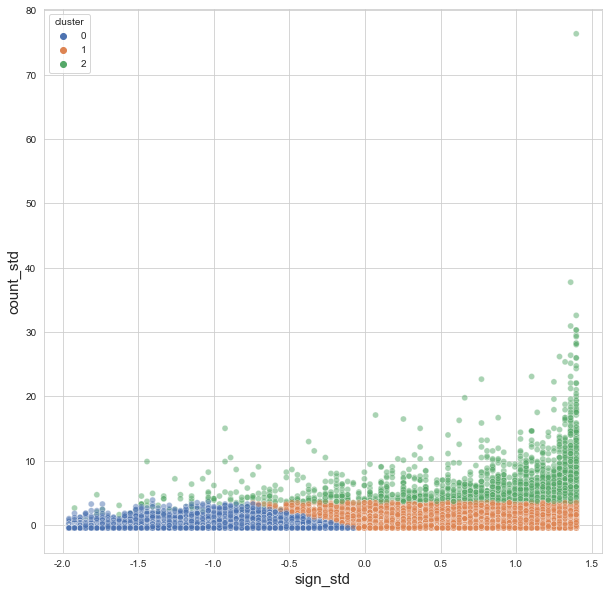

In [787]:
ids = kmeans.fit_predict(df_std1[['count_std', 'sign_std']])
#df_std1["predicted_label"] = estimator.labels_.astype(int)

plt.figure(figsize=(10,10))

plt.xlabel('sign_std', fontsize=15)
plt.ylabel('count_std', fontsize=15)



        # 클러스터링 그리기
sns.scatterplot(result_by_sklearn['sign_std'], result_by_sklearn['count_std'], hue=result_by_sklearn["cluster"], palette="deep", alpha=0.5)  

### 평균 대출신청 횟수, 주어진 기간 내 첫 대출조회 시간부터 6월 1일까지의 기간

<AxesSubplot:xlabel='sign_std', ylabel='is_applied_std'>

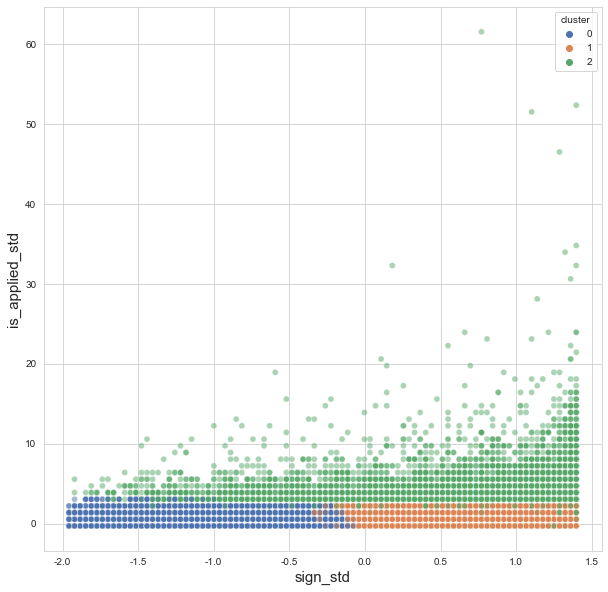

In [788]:
ids = kmeans.fit_predict(df_std1[['is_applied_std', 'sign_std']])
#df_std1["predicted_label"] = estimator.labels_.astype(int)

plt.figure(figsize=(10,10))

plt.xlabel('sign_std', fontsize=15)
plt.ylabel('is_applied_std', fontsize=15)

        # 클러스터링 그리기
sns.scatterplot(result_by_sklearn['sign_std'], result_by_sklearn['is_applied_std'], hue=result_by_sklearn["cluster"], palette="deep", alpha=0.5)  

### 평균 대출신청 횟수, 대출조회 횟수

<AxesSubplot:xlabel='count_std', ylabel='is_applied_std'>

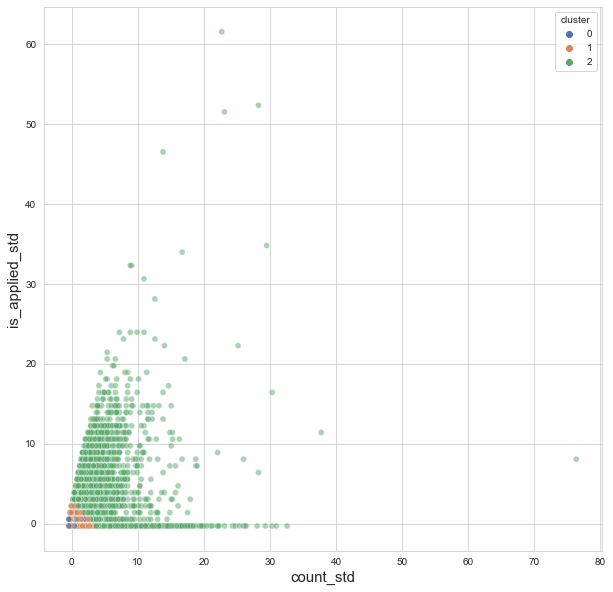

In [789]:
ids = kmeans.fit_predict(df_std1[['count_std', 'is_applied_std']])
#df_std1["predicted_label"] = estimator.labels_.astype(int)

plt.figure(figsize=(10,10))

plt.xlabel('count_std', fontsize=15)
plt.ylabel('is_applied_std', fontsize=15)

        # 클러스터링 그리기
sns.scatterplot(result_by_sklearn['count_std'], result_by_sklearn['is_applied_std'], hue=result_by_sklearn["cluster"], palette="deep", alpha=0.5)  

## 군집별 로그 가져오기!

### Cluster0 

In [732]:

result_by_sklearn.reset_index(inplace=True)

result_by_sklearn[result_by_sklearn["cluster"] ==0]["user_id"].unique()

array([     7,      9,     14, ..., 879693, 879695, 879697], dtype=int64)

In [733]:
## 36분 걸림

aa = []

for i in tqdm_notebook(range(len(user_id_list_cluserzero))):

    aa.append((user_log[user_log["user_id"] == user_id_list_cluserzero[i]]["event"].value_counts()))
    
len(user_id_list_cluserzero)

  0%|          | 0/118360 [00:00<?, ?it/s]

118360

In [734]:
clustzero_log= pd.DataFrame(aa).fillna(0)
log_sum = pd.DataFrame(clustzero_log.sum())

In [735]:
log_sum

,0
GetCreditInfo,489036.0
Login,401453.0
EndLoanApply,489563.0
StartLoanApply,349598.0
ViewLoanApplyIntro,319324.0
CompleteIDCertification,215637.0
OpenApp,555824.0
UseLoanManage,282726.0
SignUp,5243.0
UsePrepayCalc,1313.0


In [736]:
list1 = []

for i in range(len(log_sum)):
    list1.append(log_sum[0][i] / log_sum.sum()[0])


In [737]:
log_sum["ratio"] = list1
log_sum.sort_values("ratio")

,0,ratio
UseDSRCalc,789.0,0.000254
UsePrepayCalc,1313.0,0.000422
SignUp,5243.0,0.001686
CompleteIDCertification,215637.0,0.069325
UseLoanManage,282726.0,0.090894
ViewLoanApplyIntro,319324.0,0.102660
StartLoanApply,349598.0,0.112393
Login,401453.0,0.129064
GetCreditInfo,489036.0,0.157221
EndLoanApply,489563.0,0.157390


### Cluster1 

In [738]:
user_id_list_clusterone= result_by_sklearn[result_by_sklearn["cluster"] == 1]["user_id"].unique()

In [739]:
## 44분걸림

bb = []

for i in tqdm_notebook(range(len(user_id_list_clusterone))):

    bb.append((user_log[user_log["user_id"] == user_id_list_clusterone[i]]["event"].value_counts()))
    
len(user_id_list_clusterone)

  0%|          | 0/145237 [00:00<?, ?it/s]

145237

In [740]:
clusterone_log= pd.DataFrame(bb).fillna(0)
logone_sum = pd.DataFrame(clusterone_log.sum())

In [741]:
list2 = []

for i in range(len(logone_sum)):
    list2.append(logone_sum[0][i] / logone_sum.sum()[0])

In [742]:
logone_sum["ratio"] = list2
logone_sum.sort_values("ratio")

,0,ratio
UseDSRCalc,2179.0,0.000310
UsePrepayCalc,3492.0,0.000496
SignUp,8833.0,0.001255
CompleteIDCertification,525853.0,0.074719
UseLoanManage,617870.0,0.087793
ViewLoanApplyIntro,734754.0,0.104401
StartLoanApply,781028.0,0.110977
GetCreditInfo,944445.0,0.134197
Login,971285.0,0.138010
EndLoanApply,1125056.0,0.159860


### Cluster2

In [743]:
user_id_list_clustertwo= result_by_sklearn[result_by_sklearn["cluster"] == 2]["user_id"].unique()

In [744]:
## 3분걸림

cc = []

for i in tqdm_notebook(range(len(user_id_list_clustertwo))):

    cc.append((user_log[user_log["user_id"] == user_id_list_clustertwo[i]]["event"].value_counts()))
    
len(user_id_list_clustertwo)

  0%|          | 0/10697 [00:00<?, ?it/s]

10697

In [745]:
clusterone_two= pd.DataFrame(cc).fillna(0)
logtwo_sum = pd.DataFrame(clusterone_two.sum())

In [746]:
list3 = []

for i in range(len(logtwo_sum)):
    list3.append(logtwo_sum[0][i] / logtwo_sum.sum()[0])

In [747]:
logtwo_sum["ratio"] = list3
logtwo_sum.sort_values("ratio")

,0,ratio
UseDSRCalc,326.0,0.000133
UsePrepayCalc,543.0,0.000222
SignUp,1481.0,0.000605
UseLoanManage,152737.0,0.062373
CompleteIDCertification,219484.0,0.089630
GetCreditInfo,229975.0,0.093914
ViewLoanApplyIntro,287428.0,0.117376
Login,314416.0,0.128397
StartLoanApply,326311.0,0.133255
OpenApp,416054.0,0.169903


In [748]:
log_sum.rename(columns={0:'count'},inplace=True)
logone_sum.rename(columns={0:'count'},inplace=True)
logtwo_sum.rename(columns={0:'count'},inplace=True)

log_sum['ratio']=round(log_sum['ratio'],3)
logone_sum['ratio']=round(logone_sum['ratio'],3)
logtwo_sum['ratio']=round(logtwo_sum['ratio'],3)

print("전체에 대한 로그데이터 행의 개수는    {:,}개" .format(len(user_log)) )
print("0번 군집에 대한 로그데이터 행의 개수는 {:,}개" .format(len(clusterzero_log)) )
print("1번 군집에 대한 로그데이터 행의 개수는 {:,}개" .format(len(clusterone_log)) )
print("2번 군집에 대한 로그데이터 행의 개수는 {:,}개" .format(len(clustertwo_log)) )

전체에 대한 로그데이터 행의 개수는    17,843,993개
0번 군집에 대한 로그데이터 행의 개수는 3,110,506개
1번 군집에 대한 로그데이터 행의 개수는 145,237개
2번 군집에 대한 로그데이터 행의 개수는 2,448,780개


In [749]:
# 군집에 따른 로그데이터 만들기
clusterzero_log=user_log[user_log['user_id'].isin(user_id_list_cluserzero)]
clusterone_log=user_log[user_log['user_id'].isin(user_id_list_clusterone)]
clustertwo_log=user_log[user_log['user_id'].isin(user_id_list_clustertwo)]

### 오래 걸리는 리스트 따로 저장 정리

In [750]:
#log_sum2=log_sum.reset_index()
#logone_sum2=logone_sum.reset_index()
#logtwo_sum2=logtwo_sum.reset_index()

In [751]:
#log_sum2.to_csv('log_sum.csv',index=False)
#logone_sum2.to_csv('logone_sum.csv',index=False)
#logtwo_sum2.to_csv('logtwo_sum.csv',index=False)
#clusterzero_log.to_csv('clusterzero_log.csv',index=False)
#clusterone_log.to_csv('clusterone_log.csv',index=False)
#clustertwo_log.to_csv('clustertwo_log.csv',index=False)

### 불러오는 코드

In [752]:
#log_sum = pd.read_csv('log_sum.csv')
#logone_sum = pd.read_csv('logone_sum.csv')
#logtwo_sum = pd.read_csv('logtwo_sum.csv')

#clusterzero_log = pd.read_csv('clusterzero_log.csv')
#clusterone_log = pd.read_csv('clusterone_log.csv')
#clustertwo_log = pd.read_csv('clustertwo_log.csv')

#log_sum=log_sum.set_index('index')
#logone_sum=logone_sum.set_index('index')
#logtwo_sum=logtwo_sum.set_index('index')

In [753]:
# event_group 리스트 만들기
event_group=user_log['event'].unique()

In [754]:
kk=(event_group[9],event_group[3],event_group[6],
event_group[1],event_group[0],event_group[7],event_group[2],
event_group[4],event_group[5],event_group[8],
event_group[10])
event_order=list(kk)

### 군집별 로그 데이터의 event 시각화 

In [755]:
import seaborn as sns

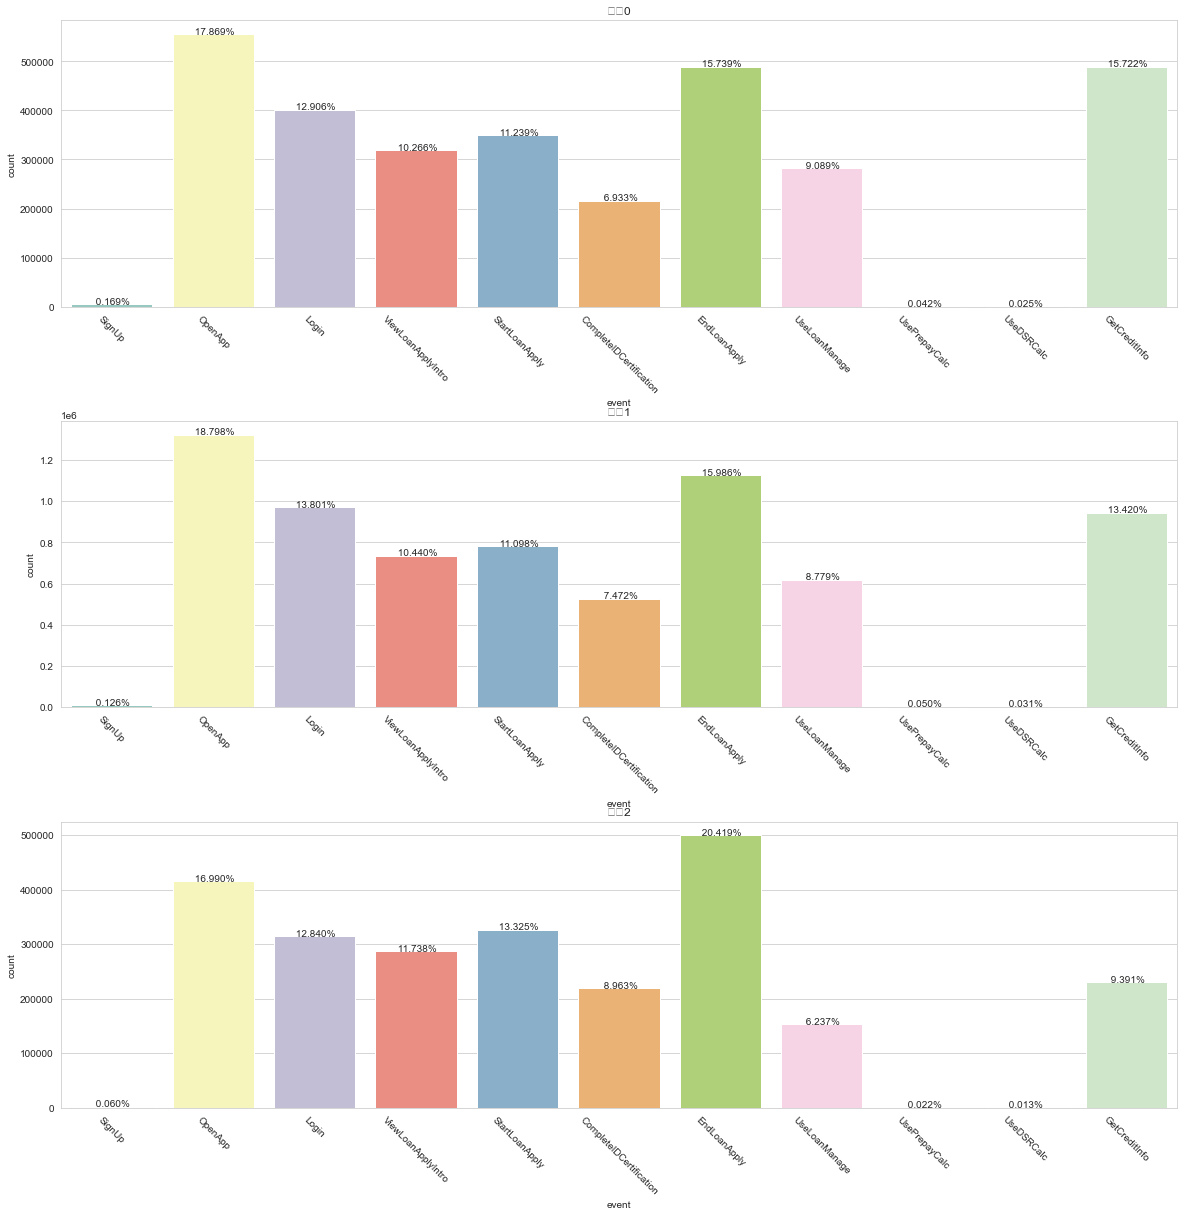

In [756]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')

plt.subplot(3,1,1)
a2=sns.countplot(x='event',data=clusterzero_log, palette='Set3',order=event_order)
plt.xticks(rotation=-45)
plt.title('군집0')
for patch in a2.patches:
    a2.text(x= patch.get_x() + patch.get_width()/2,
           y= patch.get_height() + len(clusterzero_log)*0.0001,
           s= f'{ (patch.get_height()/len(clusterzero_log))*100: 1.3f}%',
           ha='center')

plt.subplot(3,1,2)
a3=sns.countplot(x='event',data=clusterone_log, palette='Set3',order=event_order)
plt.xticks(rotation=-45)
plt.title('군집1')
for patch in a3.patches:
    a3.text(x= patch.get_x() + patch.get_width()/2,
           y= patch.get_height() + len(clusterone_log)*0.0001,
           s= f'{ (patch.get_height()/len(clusterone_log))*100: 1.3f}%',
           ha='center')

plt.subplot(3,1,3)
a4=sns.countplot(x='event',data=clustertwo_log, palette='Set3',order=event_order)
plt.xticks(rotation=-45)
plt.title('군집2')
for patch in a4.patches:
    a4.text(x= patch.get_x() + patch.get_width()/2,
           y= patch.get_height() + len(clustertwo_log)*0.0001,
           s= f'{ (patch.get_height()/len(clustertwo_log))*100: 1.3f}%',
           ha='center')

plt.subplots_adjust(hspace = 0.4)
plt.show()

### Cluster2에서 대출관련 로그 빈도가 타 군집에 비해 상대적으로 높다. 회원가입 비중이 적다. 서비스 활용 비중 적다. 신용조회 서비스 활용이 비중 적다.

In [757]:
log_sum.rename(columns={'count':'count_0','ratio':'ratio_0'},inplace=True)
logone_sum.rename(columns={'count':'count_1','ratio':'ratio_1'},inplace=True)
logtwo_sum.rename(columns={'count':'count_2','ratio':'ratio_2'},inplace=True)

event=pd.concat( (log_sum,logone_sum,logtwo_sum), axis=1, join='outer' )
event

,count_0,ratio_0,count_1,ratio_1,count_2,ratio_2
GetCreditInfo,489036.0,0.157,944445.0,0.134,229975.0,0.094
Login,401453.0,0.129,971285.0,0.138,314416.0,0.128
EndLoanApply,489563.0,0.157,1125056.0,0.160,500025.0,0.204
StartLoanApply,349598.0,0.112,781028.0,0.111,326311.0,0.133
ViewLoanApplyIntro,319324.0,0.103,734754.0,0.104,287428.0,0.117
CompleteIDCertification,215637.0,0.069,525853.0,0.075,219484.0,0.090
OpenApp,555824.0,0.179,1322978.0,0.188,416054.0,0.170
UseLoanManage,282726.0,0.091,617870.0,0.088,152737.0,0.062
SignUp,5243.0,0.002,8833.0,0.001,1481.0,0.001
UsePrepayCalc,1313.0,0.000,3492.0,0.000,543.0,0.000


0번 군집에 대한 로그데이터 행의 개수는 3,110,506개
1번 군집에 대한 로그데이터 행의 개수는 7,037,773개
2번 군집에 대한 로그데이터 행의 개수는 2,448,780개

### 재범주화 전 확인

In [758]:
#앱실행시작 관련 :start
#Login, OpenApp
event.iloc[[1,6],:]

,count_0,ratio_0,count_1,ratio_1,count_2,ratio_2
Login,401453.0,0.129,971285.0,0.138,314416.0,0.128
OpenApp,555824.0,0.179,1322978.0,0.188,416054.0,0.170


In [759]:
#대출관련 :loan
#ViewLoanApplyIntro, StartLoanApply, CompleteIDCertification, EndLoanApply
event.iloc[2:6,:]

,count_0,ratio_0,count_1,ratio_1,count_2,ratio_2
EndLoanApply,489563.0,0.157,1125056.0,0.160,500025.0,0.204
StartLoanApply,349598.0,0.112,781028.0,0.111,326311.0,0.133
ViewLoanApplyIntro,319324.0,0.103,734754.0,0.104,287428.0,0.117
CompleteIDCertification,215637.0,0.069,525853.0,0.075,219484.0,0.090


In [760]:
#서비스관련 :service
#UsePrepayCalc, UseDSRCalc
event.iloc[[9,10],:]

,count_0,ratio_0,count_1,ratio_1,count_2,ratio_2
UsePrepayCalc,1313.0,0.0,3492.0,0.0,543.0,0.0
UseDSRCalc,789.0,0.0,2179.0,0.0,326.0,0.0


In [761]:
#회원가입 : SignUp
event.iloc[8,:]

count_0    5243.000
ratio_0       0.002
count_1    8833.000
ratio_1       0.001
count_2    1481.000
ratio_2       0.001
Name: SignUp, dtype: float64

In [762]:
#KCB 신용정보조회 : GetCreditInfo
event.iloc[0,:]

count_0    489036.000
ratio_0         0.157
count_1    944445.000
ratio_1         0.134
count_2    229975.000
ratio_2         0.094
Name: GetCreditInfo, dtype: float64

In [763]:
#대출관리 서비스 이용 : UseLoanManage
event.iloc[7,:]

count_0    282726.000
ratio_0         0.091
count_1    617870.000
ratio_1         0.088
count_2    152737.000
ratio_2         0.062
Name: UseLoanManage, dtype: float64

### 재범주화 시작

In [764]:
recate=event.copy()
start=pd.DataFrame(recate.iloc[[1,6],:].sum())
loan=pd.DataFrame(recate.iloc[[2,3,4,5],:].sum())
service=pd.DataFrame(recate.iloc[[9,10],:].sum())
SignUp=pd.DataFrame(recate.iloc[8,:])
GetCreditInfo=pd.DataFrame(recate.iloc[0,:])
UseLoanManage=pd.DataFrame(recate.iloc[7,:])

In [765]:
recate2=pd.concat( (start,loan,service,SignUp,GetCreditInfo,UseLoanManage), axis=1, join='outer' )
recate2.columns = ["start","loan","service", "SignUp",'GetCreditInfo' ,"UseLoanManage"]
recate2

,start,loan,service,SignUp,GetCreditInfo,UseLoanManage
count_0,957277.000,1374122.000,2102.0,5243.000,489036.000,282726.000
ratio_0,0.308,0.441,0.0,0.002,0.157,0.091
count_1,2294263.000,3166691.000,5671.0,8833.000,944445.000,617870.000
ratio_1,0.326,0.450,0.0,0.001,0.134,0.088
count_2,730470.000,1333248.000,869.0,1481.000,229975.000,152737.000
ratio_2,0.298,0.544,0.0,0.001,0.094,0.062


In [766]:
recate3=recate2.copy()
recate3=recate3.transpose()
recate3

,count_0,ratio_0,count_1,ratio_1,count_2,ratio_2
start,957277.0,0.308,2294263.0,0.326,730470.0,0.298
loan,1374122.0,0.441,3166691.0,0.450,1333248.0,0.544
service,2102.0,0.000,5671.0,0.000,869.0,0.000
SignUp,5243.0,0.002,8833.0,0.001,1481.0,0.001
GetCreditInfo,489036.0,0.157,944445.0,0.134,229975.0,0.094
UseLoanManage,282726.0,0.091,617870.0,0.088,152737.0,0.062


In [767]:
recate3.drop(['ratio_0','ratio_1','ratio_2'],axis=1,inplace=True)
recate3['w_ratio_0'] = round((recate3['count_0']/len(clusterzero_log)) /((recate3['count_0']/len(clusterzero_log)) + (recate3['count_1']/len(clusterone_log)) + (recate3['count_2']/len(clustertwo_log))),3)  
recate3['w_ratio_1'] = round((recate3['count_1']/len(clusterone_log)) /((recate3['count_0']/len(clusterzero_log)) + (recate3['count_1']/len(clusterone_log)) + (recate3['count_2']/len(clustertwo_log))),3)  
recate3['w_ratio_2'] = round((recate3['count_2']/len(clustertwo_log)) /((recate3['count_0']/len(clusterzero_log)) + (recate3['count_1']/len(clusterone_log)) + (recate3['count_2']/len(clustertwo_log))),3)  

recate3

,count_0,count_1,count_2,w_ratio_0,w_ratio_1,w_ratio_2
start,957277.0,2294263.0,730470.0,0.330,0.350,0.320
loan,1374122.0,3166691.0,1333248.0,0.308,0.313,0.379
service,2102.0,5671.0,869.0,0.368,0.439,0.193
SignUp,5243.0,8833.0,1481.0,0.475,0.354,0.171
GetCreditInfo,489036.0,944445.0,229975.0,0.408,0.348,0.244
UseLoanManage,282726.0,617870.0,152737.0,0.377,0.364,0.259


### 군집끼리 비교 시각화

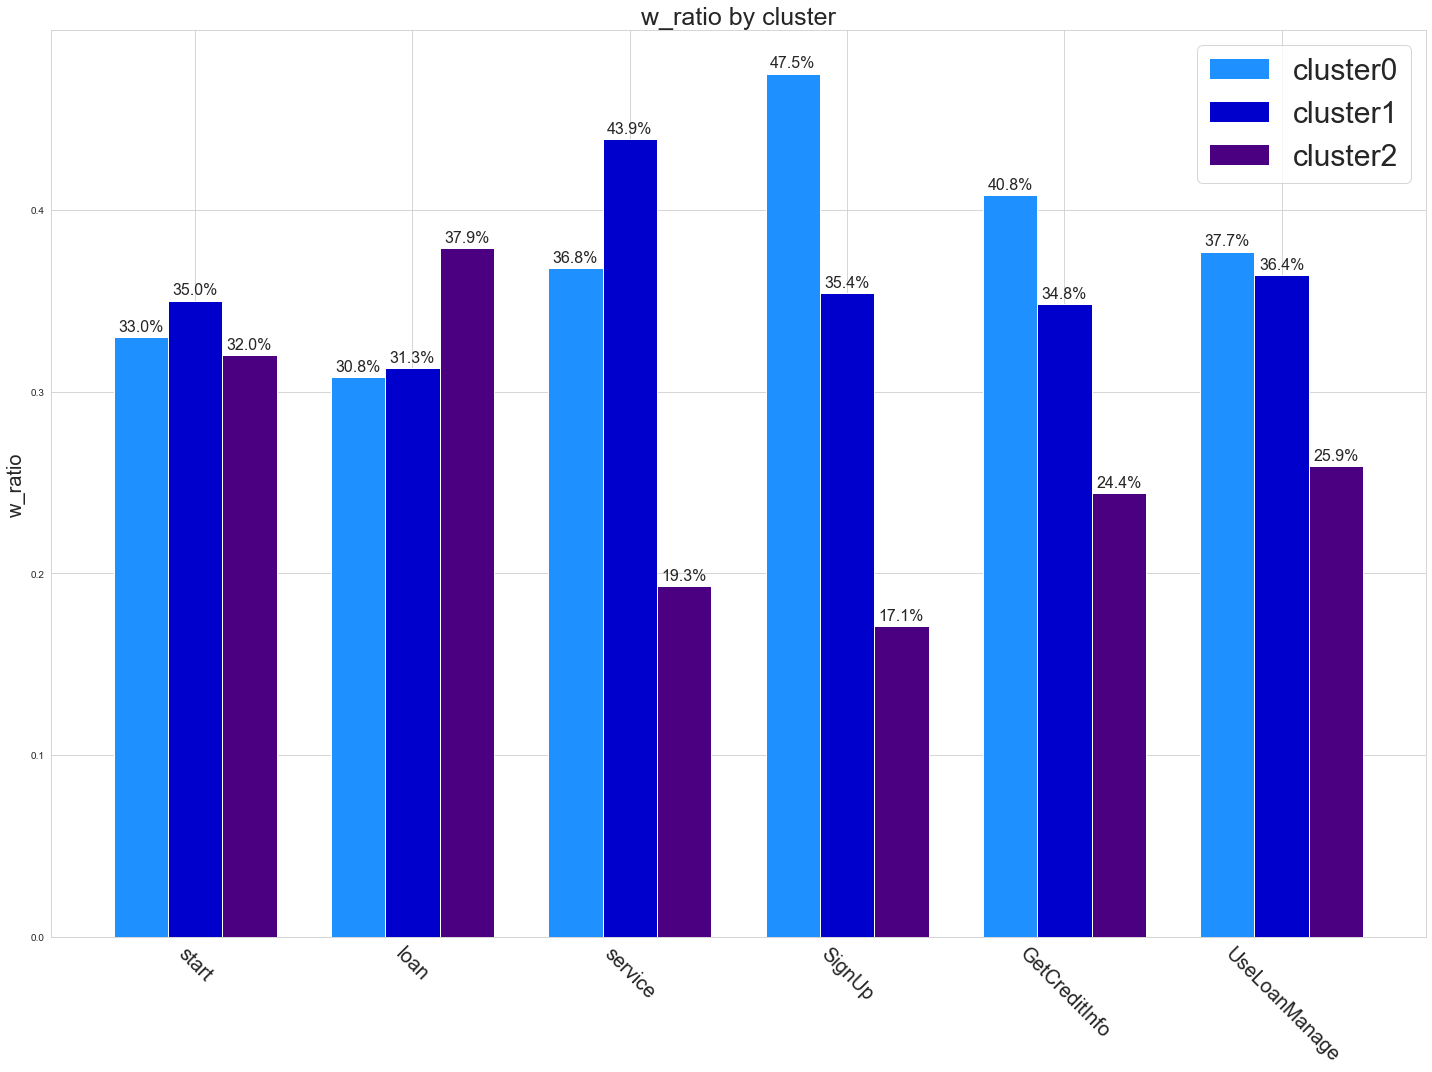

In [768]:
#labels = event4.index.tolist()
cluster0 = recate3['w_ratio_0']
cluster1 = recate3['w_ratio_1']
cluster2 = recate3['w_ratio_2']

x = np.arange(len(cluster0))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20,15))
rects0 = ax.bar(x - width, cluster0, width, label='cluster0',color="dodgerblue")
rects1 = ax.bar(x , cluster1, width, label='cluster1',color="mediumblue")
rects2 = ax.bar(x + width, cluster2, width, label='cluster2',color="indigo")

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('w_ratio',fontsize=20)
ax.set_title('w_ratio by cluster',fontsize=25)
#ax.set_xticks(x)
ax.set_xticklabels(['asd','start', 'loan', 'service', 'SignUp', 'GetCreditInfo', 'UseLoanManage'] ,fontsize=20)
ax.legend(fontsize=30)

A_as_ticklabel = [f"{100*a}%" for a in cluster0]
B_as_ticklabel = [f"{100*b}%" for b in cluster1]
C_as_ticklabel = [f"{100*c}%" for c in cluster2]
C_as_ticklabel[5] = "25.9%"

ax.bar_label(rects0 , labels=A_as_ticklabel, padding=3,size=16)
ax.bar_label(rects1, labels=B_as_ticklabel, padding=3,size=16)
ax.bar_label(rects2, labels=C_as_ticklabel, padding=3,size=16)

plt.xticks(rotation=-45)
fig.tight_layout()

plt.show()